In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
from tqdm import tqdm
import cv2
import numpy as np
import matplotlib.pyplot as plt

import random

from sklearn.utils import shuffle

from PIL import Image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, activations
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.models import load_model

from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
#from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model

from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.layers import GlobalAveragePooling2D
from keras.utils import plot_model

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns


from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50

from sklearn.model_selection import train_test_split


%matplotlib inline

In [3]:
path_dataset = "/content/drive/MyDrive/DIAIDeepLearningAssignment2/data_assign_2/hand_written_digits"

In [4]:
gen=ImageDataGenerator(rescale=1./255,validation_split=0.2)
image_size = (224, 224)
batch_size=16

train_generator = gen.flow_from_directory(
    path_dataset,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)
test_generator = gen.flow_from_directory(
    path_dataset,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False,
    subset='validation'
)


Found 3728 images belonging to 3 classes.
Found 930 images belonging to 3 classes.


In [5]:
model = tf.keras.Sequential([
        # 1st Convolutional Layer


        tf.keras.layers.Conv2D(filters=32, kernel_size=(5,5), strides=(2,2), activation='relu', input_shape=(224,224,3)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),

        # 2nd Convolutional Layer
        tf.keras.layers.Conv2D(filters=128, kernel_size=(5,5), strides=(1,1), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),

        # 3rd Convolutional Layer
       # tf.keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
        #tf.keras.layers.BatchNormalization(),

        # 4th Convolutional Layer
       # tf.keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
        #tf.keras.layers.BatchNormalization(),

        # 5th Convolutional Layer
        #tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
        #tf.keras.layers.BatchNormalization(),
        #tf.keras.layers.MaxPooling2D(pool_size=(3,3), strides=(2,2)),

        # Flattening
        tf.keras.layers.Flatten(),

        # 1st Fully Connected Layer
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.5),

        # 2nd Fully Connected Layer
        #tf.keras.layers.Dense(4096, activation='relu'),
        #tf.keras.layers.Dropout(0.5),

        # 3rd Fully Connected Layer
        tf.keras.layers.Dense(3, activation='softmax')
    ])

In [6]:
model.compile(loss='categorical_crossentropy', optimizer=tf.optimizers.SGD(learning_rate=0.001), metrics=['accuracy'])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 110, 110, 32)      2432      
                                                                 
 batch_normalization (Batch  (None, 110, 110, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 55, 55, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 55, 55, 128)       102528    
                                                                 
 batch_normalization_1 (Bat  (None, 55, 55, 128)       512       
 chNormalization)                                                
                                                        

In [8]:
model_trained = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=test_generator,
    validation_steps=len(test_generator)
)

Epoch 1/10
233/233 [==============================] - 673s 3s/step - loss: 0.1291 - accuracy: 0.9654 - val_loss: 0.2149 - val_accuracy: 0.9645
Epoch 2/10
233/233 [==============================] - 12s 53ms/step - loss: 0.0291 - accuracy: 0.9909 - val_loss: 0.0389 - val_accuracy: 0.9882
Epoch 3/10
233/233 [==============================] - 13s 56ms/step - loss: 0.0213 - accuracy: 0.9922 - val_loss: 0.0334 - val_accuracy: 0.9892
Epoch 4/10
233/233 [==============================] - 12s 51ms/step - loss: 0.0143 - accuracy: 0.9954 - val_loss: 0.0264 - val_accuracy: 0.9903
Epoch 5/10
233/233 [==============================] - 11s 47ms/step - loss: 0.0095 - accuracy: 0.9979 - val_loss: 0.0232 - val_accuracy: 0.9925
Epoch 6/10
233/233 [==============================] - 13s 54ms/step - loss: 0.0063 - accuracy: 0.9989 - val_loss: 0.0281 - val_accuracy: 0.9903
Epoch 7/10
233/233 [==============================] - 12s 53ms/step - loss: 0.0053 - accuracy: 0.9979 - val_loss: 0.0258 - val_accuracy: 

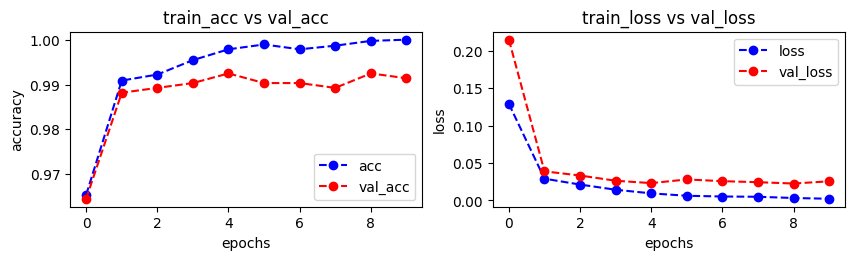

In [9]:
fig = plt.figure(figsize=(10,5))

# Plot accuracy
plt.subplot(221)
plt.plot(model_trained.history['accuracy'],'bo--', label = "acc")
plt.plot(model_trained.history['val_accuracy'], 'ro--', label = "val_acc")
plt.title("train_acc vs val_acc")
plt.ylabel("accuracy")
plt.xlabel("epochs")
plt.legend()

# Plot loss function
plt.subplot(222)
plt.plot(model_trained.history['loss'],'bo--', label = "loss")
plt.plot(model_trained.history['val_loss'], 'ro--', label = "val_loss")
plt.title("train_loss vs val_loss")
plt.ylabel("loss")
plt.xlabel("epochs")

plt.legend()
plt.show()

In [10]:
model_trained.history

{'loss': [0.12910395860671997,
  0.02911549061536789,
  0.02125275693833828,
  0.014333692379295826,
  0.009479726664721966,
  0.006265485659241676,
  0.005286588799208403,
  0.004922025371342897,
  0.0032809763215482235,
  0.002255988074466586],
 'accuracy': [0.9653970003128052,
  0.9908798336982727,
  0.9922210574150085,
  0.995439887046814,
  0.9978540539741516,
  0.9989270567893982,
  0.9978540539741516,
  0.9986587762832642,
  0.9997317790985107,
  1.0],
 'val_loss': [0.21493464708328247,
  0.0389106385409832,
  0.033352360129356384,
  0.026362767443060875,
  0.023175446316599846,
  0.028090858832001686,
  0.02578696422278881,
  0.02440531924366951,
  0.022629287093877792,
  0.025584302842617035],
 'val_accuracy': [0.9645161032676697,
  0.9881720542907715,
  0.9892473220825195,
  0.9903225898742676,
  0.9924731254577637,
  0.9903225898742676,
  0.9903225898742676,
  0.9892473220825195,
  0.9924731254577637,
  0.9913978576660156]}

In [11]:
model.save('/content/drive/MyDrive/DIAIDeepLearningAssignment2/AlexNet.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [12]:
model_AlexNet = load_model('/content/drive/MyDrive/DIAIDeepLearningAssignment2/AlexNet.h5')

In [13]:
model_AlexNet

In [14]:
loss, acc = model.evaluate(test_generator, verbose=2)
print(f'Test accuracy: {acc:.4f}')

59/59 - 2s - loss: 0.0256 - accuracy: 0.9914 - 2s/epoch - 36ms/step
Test accuracy: 0.9914


In [15]:
y_pred_test= model.predict_generator(test_generator)
y_pred = np.argmax(y_pred_test, axis=1)

# Get the true labels from the test generator
test_labels = test_generator.classes

<ipython-input-15-ae0d8405c3fe>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred_test= model.predict_generator(test_generator)


In [16]:
conf_matrix_AlexNet = confusion_matrix(test_labels, y_pred)

<Axes: >

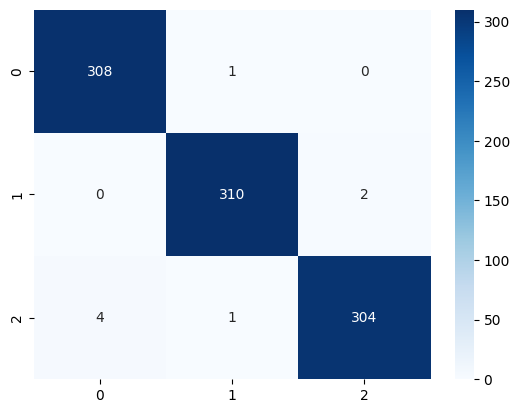

In [17]:
sns.heatmap(conf_matrix_AlexNet, annot=True, cmap="Blues", fmt='g')

In [18]:
# load pre-trained VGG16 model
vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

58889256/58889256 [==============================] - 0s 0us/step


In [19]:
vgg16_model.input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>

In [20]:
# freeze all layers in the pre-trained model
for layer in vgg16_model.layers:
    layer.trainable = False

In [21]:
# add our own top layers
x = vgg16_model.output
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(3, activation='softmax')(x)

In [22]:
# create a new model by combining pre-trained VGG16 with your own top layers
model_VGG16 = Model(inputs=vgg16_model.input, outputs=predictions)

In [23]:
model_VGG16.compile(loss='categorical_crossentropy', optimizer=tf.optimizers.SGD(learning_rate=0.001), metrics=['accuracy'])

In [24]:
model_VGG16.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [25]:
trained_VGG16 = model_VGG16.fit(test_generator,
    steps_per_epoch=len(test_generator),
    epochs=10,
    validation_data=test_generator,
    validation_steps=len(test_generator))

Epoch 1/10
59/59 [==============================] - 14s 154ms/step - loss: 1.2436 - accuracy: 0.3860 - val_loss: 0.8331 - val_accuracy: 0.4194
Epoch 2/10
59/59 [==============================] - 8s 131ms/step - loss: 0.7866 - accuracy: 0.5796 - val_loss: 0.5148 - val_accuracy: 0.8505
Epoch 3/10
59/59 [==============================] - 8s 132ms/step - loss: 0.6066 - accuracy: 0.7323 - val_loss: 0.5078 - val_accuracy: 0.7247
Epoch 4/10
59/59 [==============================] - 8s 135ms/step - loss: 0.4543 - accuracy: 0.8247 - val_loss: 0.3569 - val_accuracy: 0.8978
Epoch 5/10
59/59 [==============================] - 8s 132ms/step - loss: 0.3451 - accuracy: 0.8935 - val_loss: 0.2344 - val_accuracy: 0.9505
Epoch 6/10
59/59 [==============================] - 8s 130ms/step - loss: 0.2945 - accuracy: 0.9140 - val_loss: 0.1717 - val_accuracy: 0.9591
Epoch 7/10
59/59 [==============================] - 8s 131ms/step - loss: 0.2203 - accuracy: 0.9333 - val_loss: 0.1972 - val_accuracy: 0.9516
Epoch

In [26]:
model_VGG16.save('/content/drive/MyDrive/DIAIDeepLearningAssignment2/VGG16_TransferLearning.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [27]:
model_VGG16 = load_model('/content/drive/MyDrive/DIAIDeepLearningAssignment2/VGG16_TransferLearning.h5')

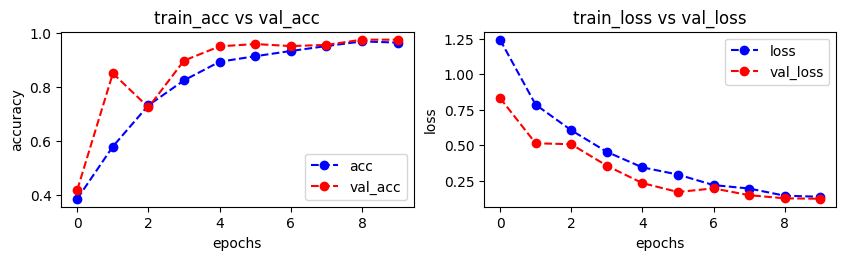

In [28]:
fig = plt.figure(figsize=(10,5))

# Plot accuracy
plt.subplot(221)
plt.plot(trained_VGG16.history['accuracy'],'bo--', label = "acc")
plt.plot(trained_VGG16.history['val_accuracy'], 'ro--', label = "val_acc")
plt.title("train_acc vs val_acc")
plt.ylabel("accuracy")
plt.xlabel("epochs")
plt.legend()

# Plot loss function
plt.subplot(222)
plt.plot(trained_VGG16.history['loss'],'bo--', label = "loss")
plt.plot(trained_VGG16.history['val_loss'], 'ro--', label = "val_loss")
plt.title("train_loss vs val_loss")
plt.ylabel("loss")
plt.xlabel("epochs")

plt.legend()
plt.show()

In [29]:
loss_VGG16, acc_VGG16 = model_VGG16.evaluate(test_generator, verbose=2)
print(f'Test accuracy: {acc_VGG16:.4f}')

59/59 - 4s - loss: 0.1241 - accuracy: 0.9753 - 4s/epoch - 67ms/step
Test accuracy: 0.9753


In [30]:
y_pred_VGG16 = np.argmax(model_VGG16.predict(test_generator), axis=-1)

59/59 [==============================] - 4s 63ms/step


In [31]:
conf_matrix_VGG16 = confusion_matrix(test_labels, y_pred_VGG16)

<Axes: >

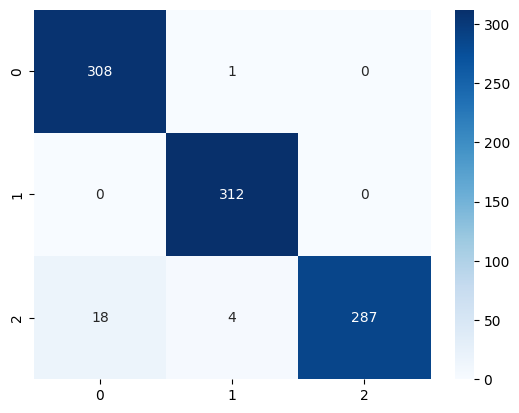

In [32]:
sns.heatmap(conf_matrix_VGG16, annot=True, cmap="Blues", fmt='g')